## Final Project
## Joseph Thomas
## DATA 4950-D01

## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart can try to understand the properties of products and stores which play a key role in increasing sales.


## Source/Useful Links 

https://www.kaggle.com/datasets/mrmorj/big-mart-sales

## Real-World/Business Objectives

1. Maximize R2_Score.
2. Sales Prediction is necessary to predict buying of unnecessary stock which remains accumulated in a store without being sold. So in order to prevent that, we need to predict the demand of each product in a store.

# Importing Packages

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
#Applying Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.metrics import mean_squared_error


warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

In [118]:
import sys
!{sys.executable} -m pip install xgboost

In [132]:
pip install cookiecutter

# Importing csv and creating DataFrame

In [119]:
df = pd.read_csv(r'C:\Users\j0o0e\Desktop\Datasets\bigmart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exploratory Data Analysis

## Info of the Dataframe

In [120]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

## Count of null Values in the DataFrame

In [121]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Describing the DataFrame

In [122]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Count of Unique Item_Identifier

In [123]:
df.Item_Identifier.value_counts(dropna=False)

FDG33    10
FDW13    10
NCJ30     9
FDW49     9
FDX31     9
         ..
FDT35     1
FDE52     1
FDN52     1
DRF48     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

## Analysis of Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

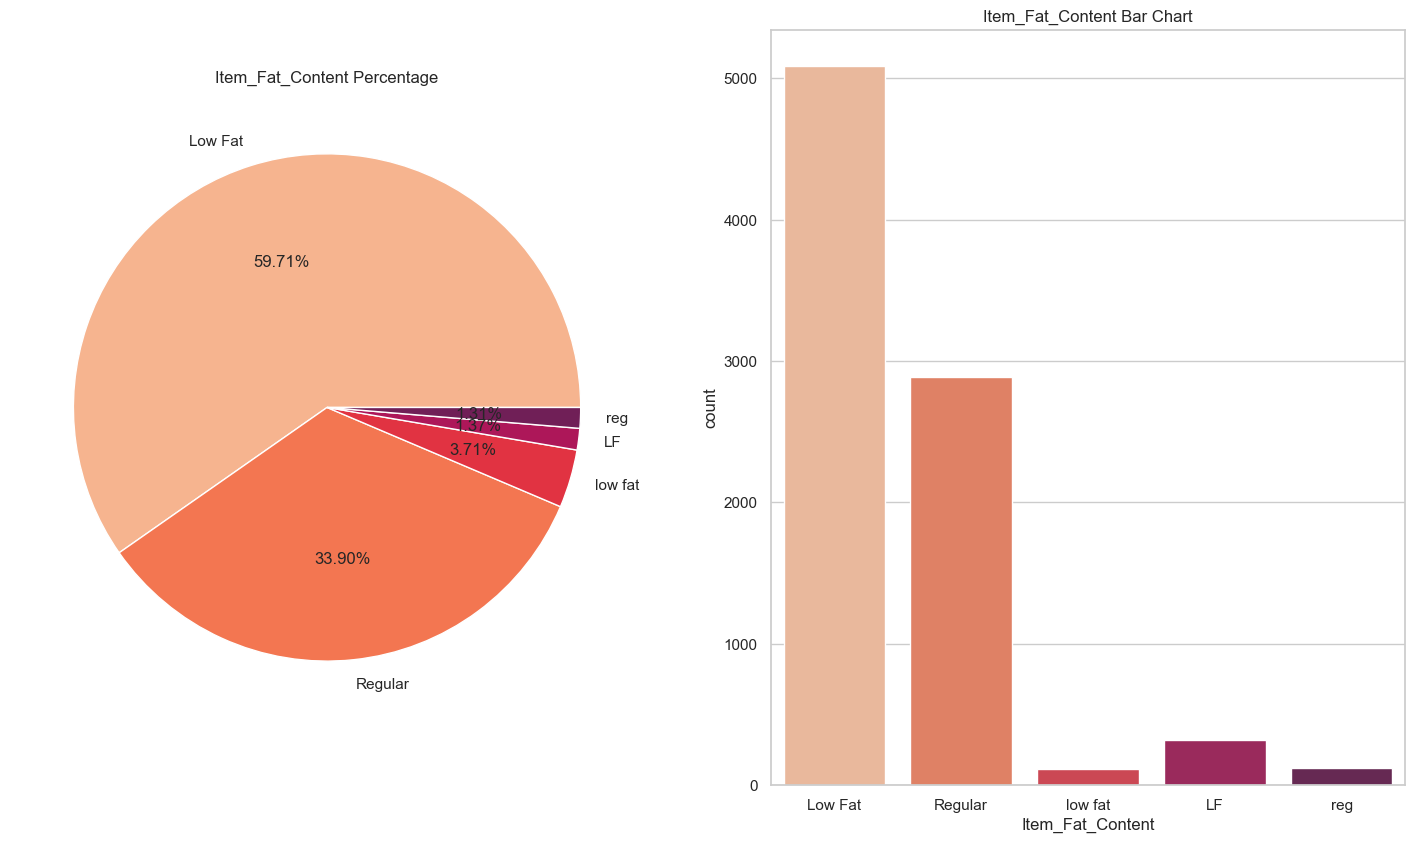

In [124]:
# Item_Fat_Content
colors=sns.color_palette('rocket_r')
labels=df['Item_Fat_Content'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Item_Fat_Content Percentage')
plt.pie(df['Item_Fat_Content'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Item_Fat_Content Bar Chart')
sns.countplot(x="Item_Fat_Content", data=df, palette=colors)

df.Item_Fat_Content.value_counts(dropna=False)

## Distribution of Item_type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

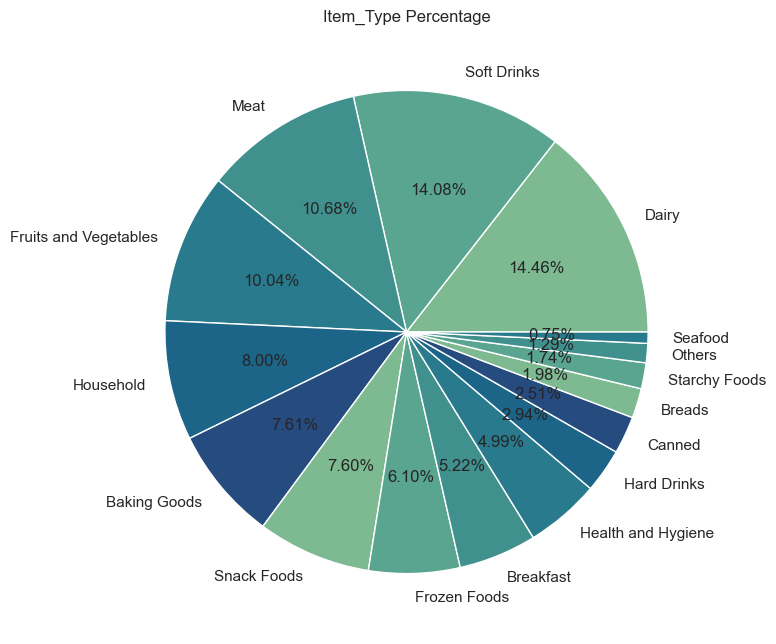

In [125]:
# Item_type
colors=sns.color_palette('crest')
labels=df['Item_Type'].dropna().unique()

plt.figure(figsize=(10,8))
plt.title('Item_Type Percentage')
plt.pie(df['Item_Type'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

df.Item_Type.value_counts(dropna=False)

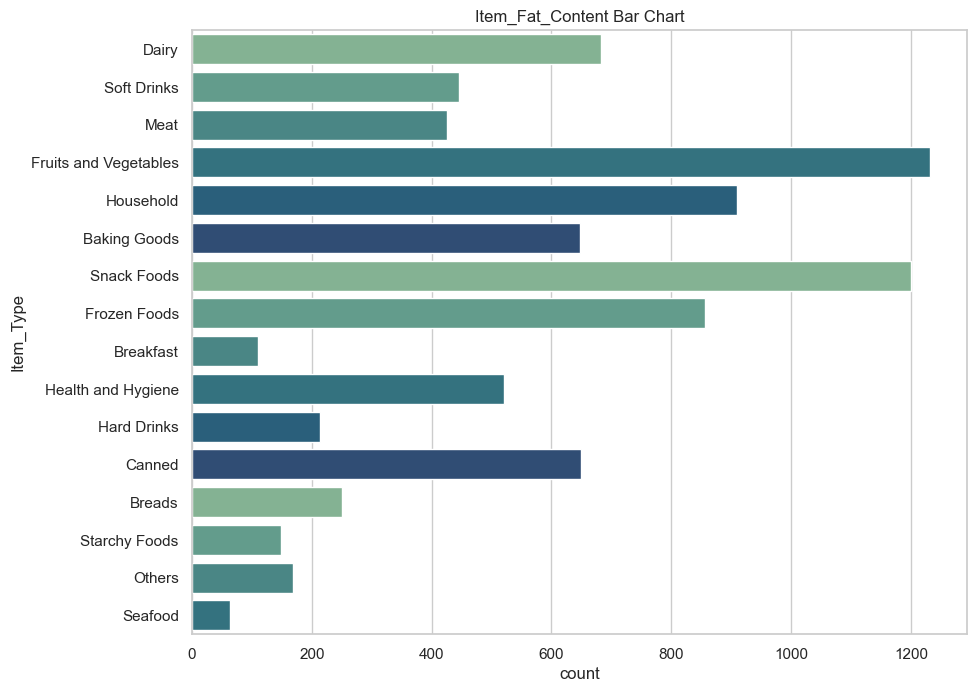

In [126]:
plt.figure(figsize=(10,8))
plt.title('Item_Fat_Content Bar Chart')
sns.countplot(y="Item_Type", data=df, palette=colors);

## Analysis of Outlet_Identifier

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

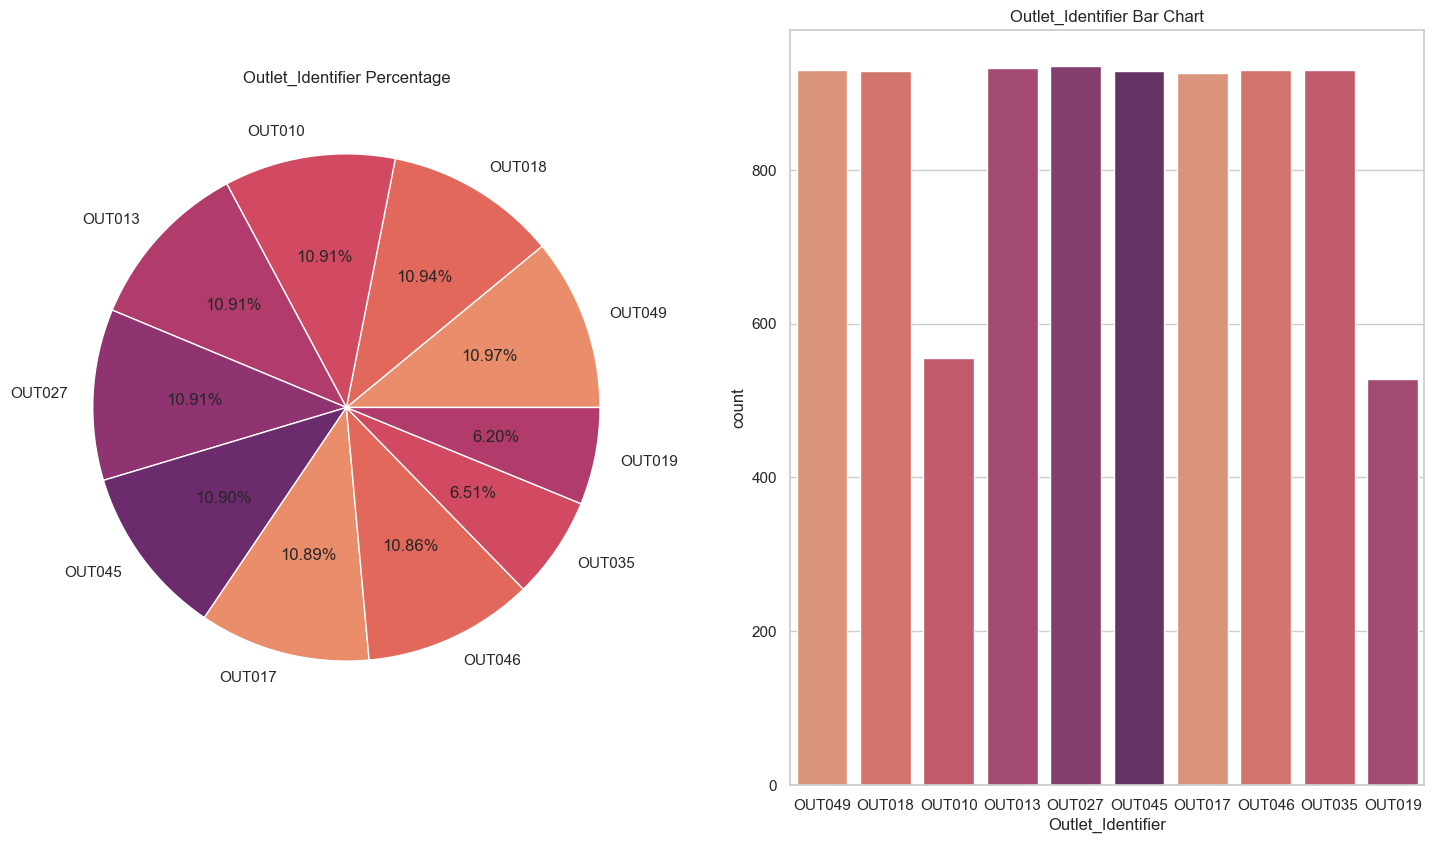

In [127]:
# Outlet_Identifier
colors=sns.color_palette('flare')
labels=df['Outlet_Identifier'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Identifier Percentage')
plt.pie(df['Outlet_Identifier'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Identifier Bar Chart')
sns.countplot(x="Outlet_Identifier", data=df, palette=colors)

df.Outlet_Identifier.value_counts(dropna=False)

## Analysis of Outlet_Size

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

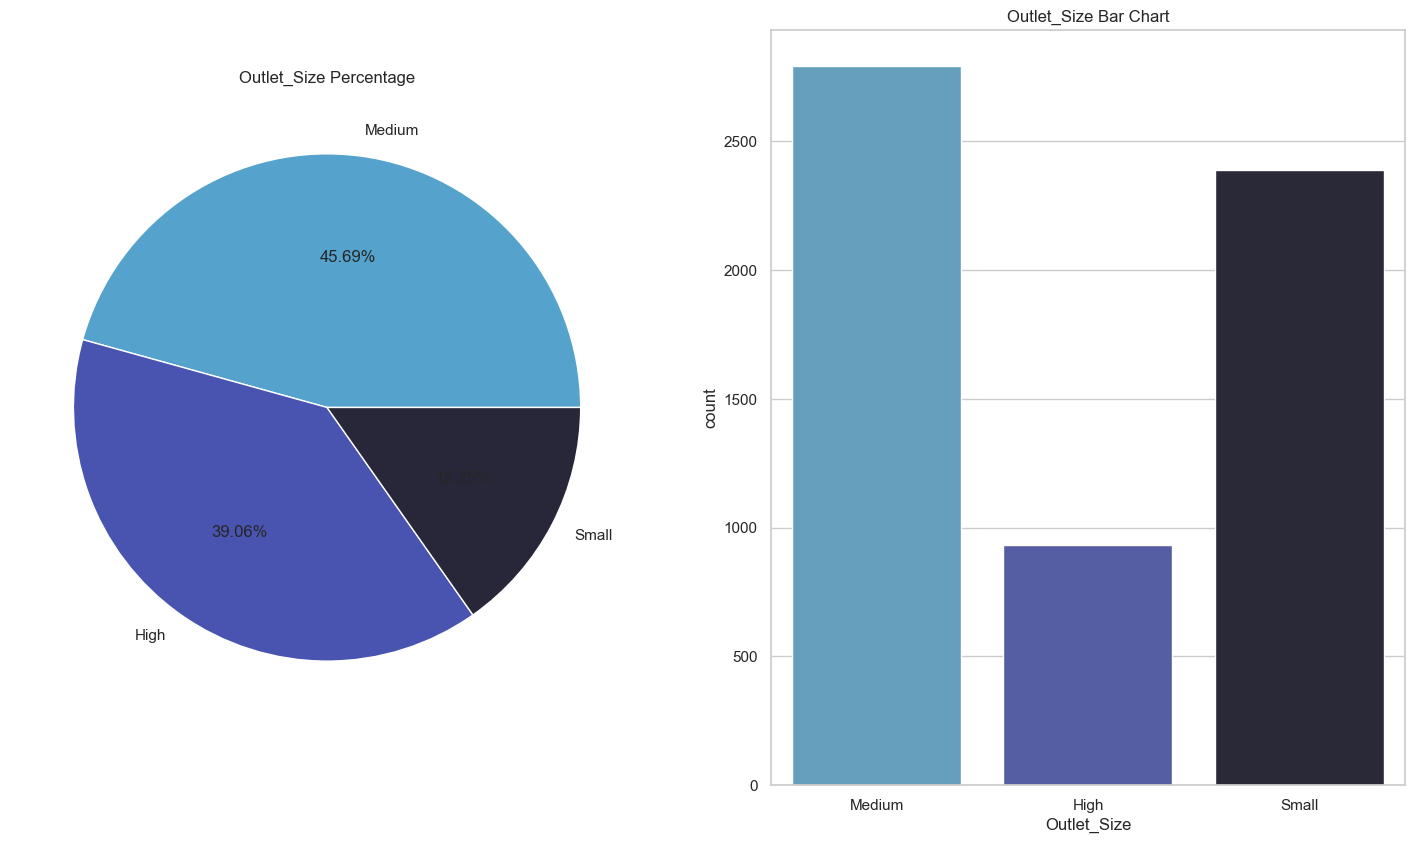

In [128]:
# Outlet_Size
colors=sns.color_palette('icefire')
labels=df['Outlet_Size'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Size Percentage')
plt.pie(df['Outlet_Size'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Size Bar Chart')
sns.countplot(x="Outlet_Size", data=df, palette=colors)

df.Outlet_Size.value_counts(dropna=False)

## Analysis of Outlet_Location_Type

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

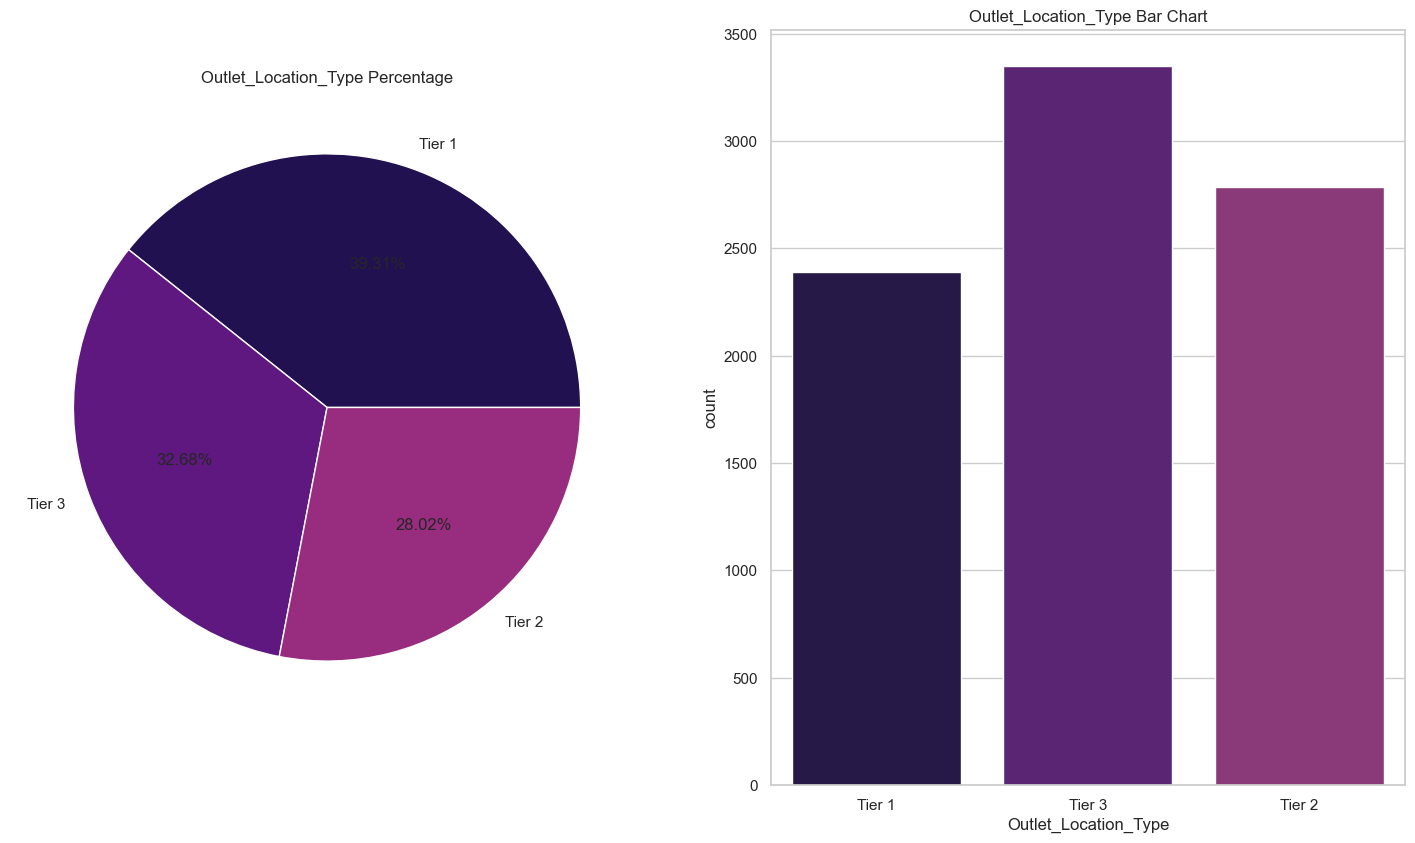

In [129]:
# Outlet_Location_Type

colors=sns.color_palette('magma')
labels=df['Outlet_Location_Type'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Location_Type Percentage')
plt.pie(df['Outlet_Location_Type'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Location_Type Bar Chart')
sns.countplot(x="Outlet_Location_Type", data=df, palette=colors)

df.Outlet_Location_Type.value_counts(dropna=False)

## Analysis of Outlet_Type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

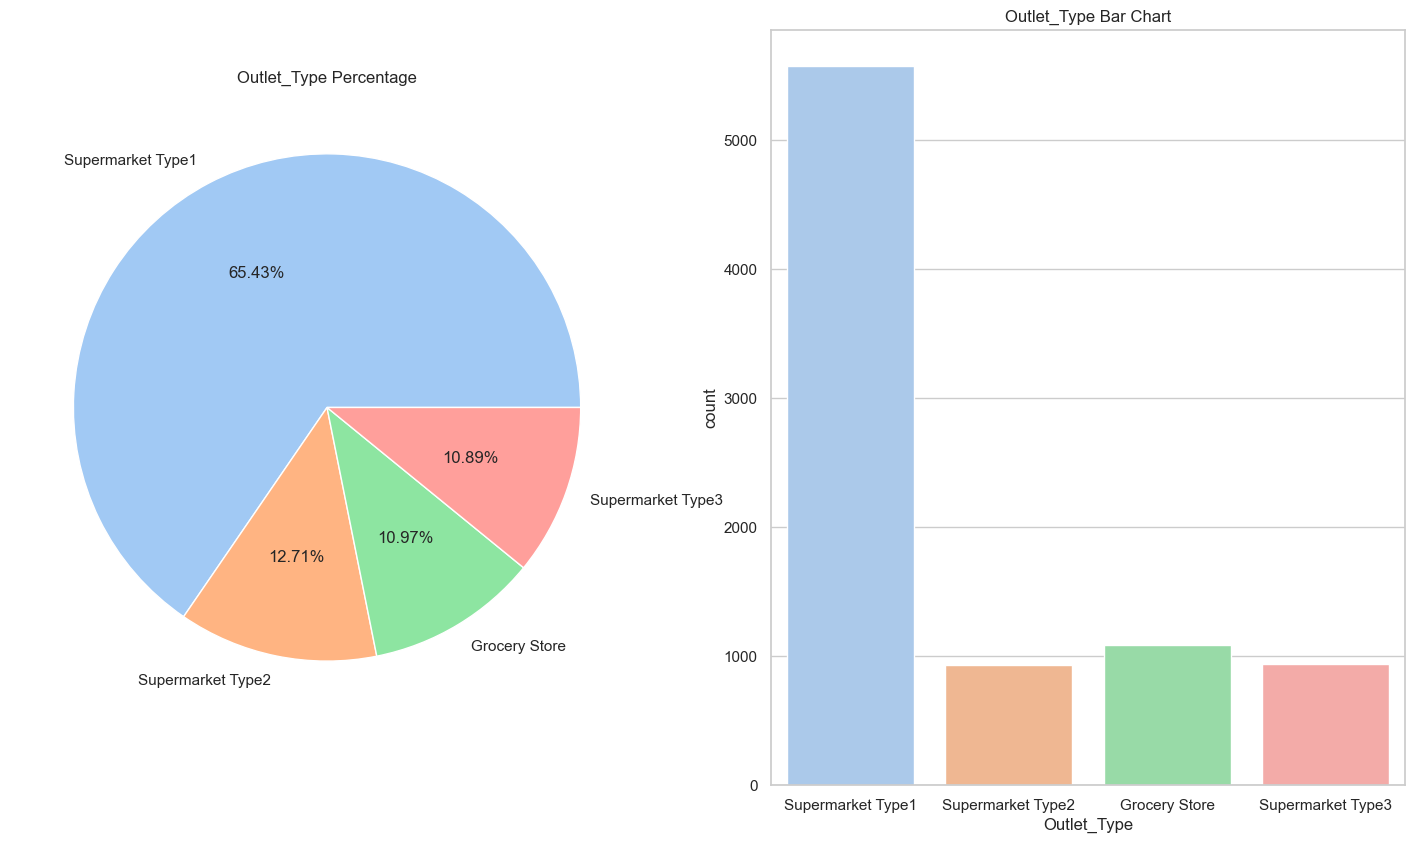

In [130]:
# Outlet_Type
colors=sns.color_palette('pastel')
labels=df['Outlet_Type'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Type Percentage')
plt.pie(df['Outlet_Type'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Type Bar Chart')
sns.countplot(x="Outlet_Type", data=df, palette=colors)

df.Outlet_Type.value_counts(dropna=False)

In [133]:
# Defining Continuous Column
df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


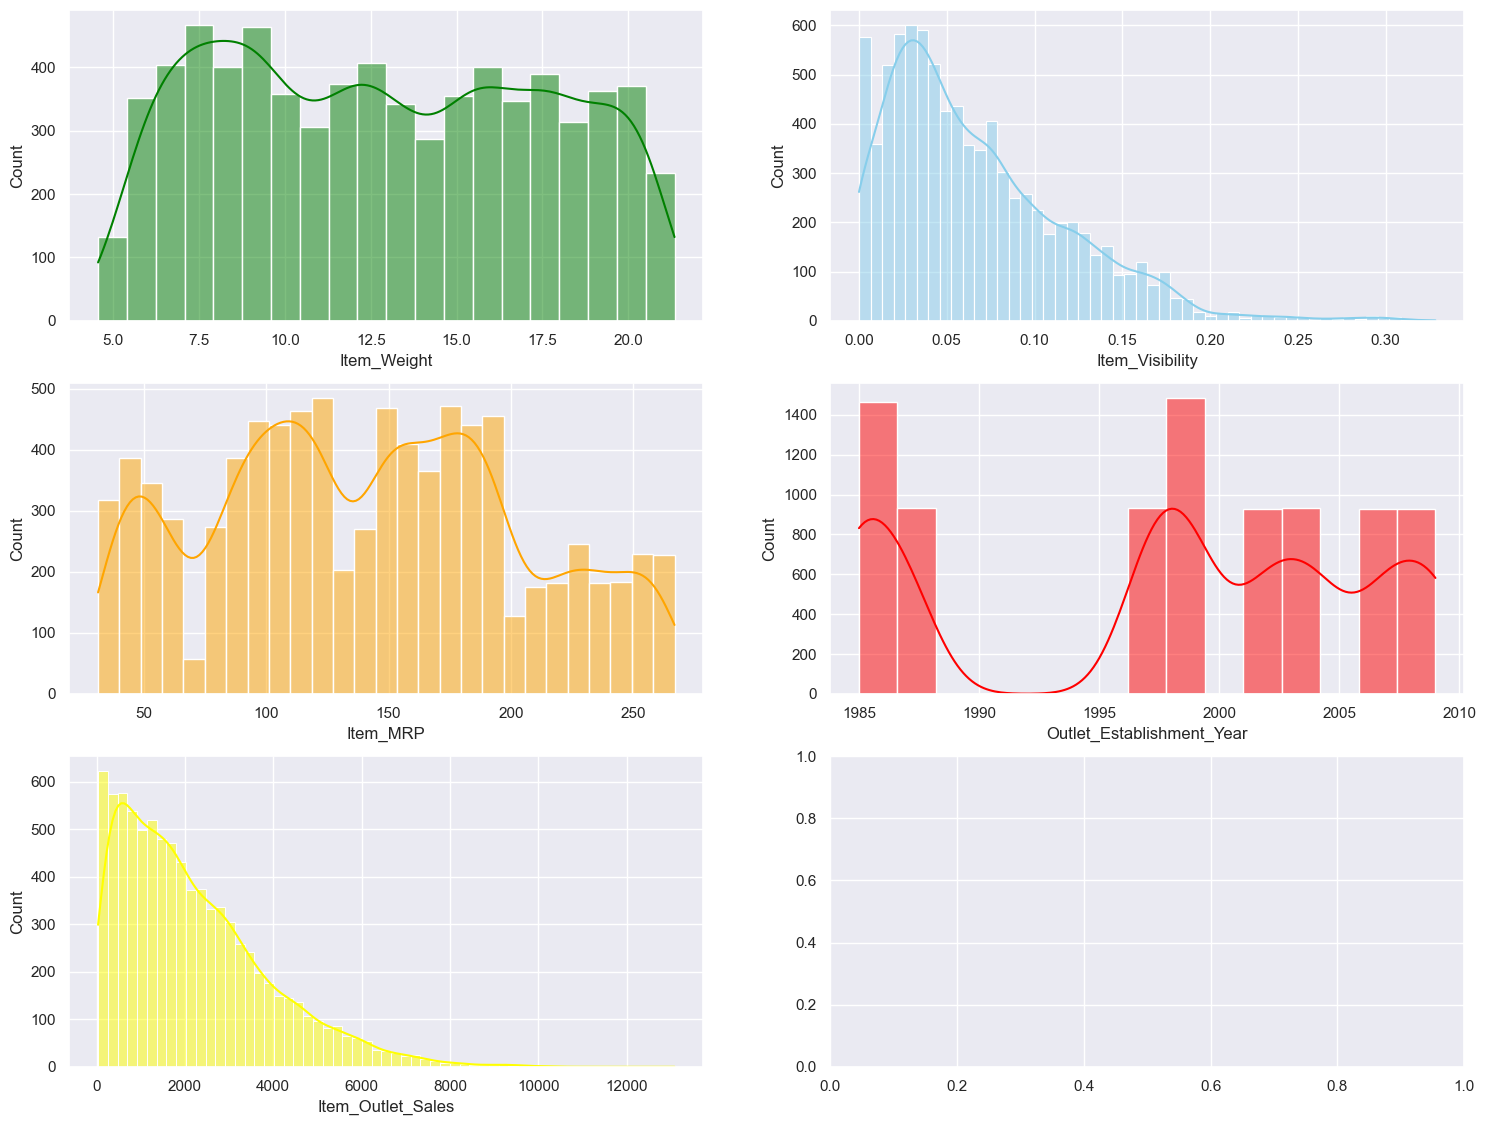

In [134]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

sns.histplot(data=df, x="Item_Weight", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="Item_Visibility", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="Item_MRP", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="Outlet_Establishment_Year", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=df, x="Item_Outlet_Sales", kde=True, ax=axs[2, 0], color='yellow');

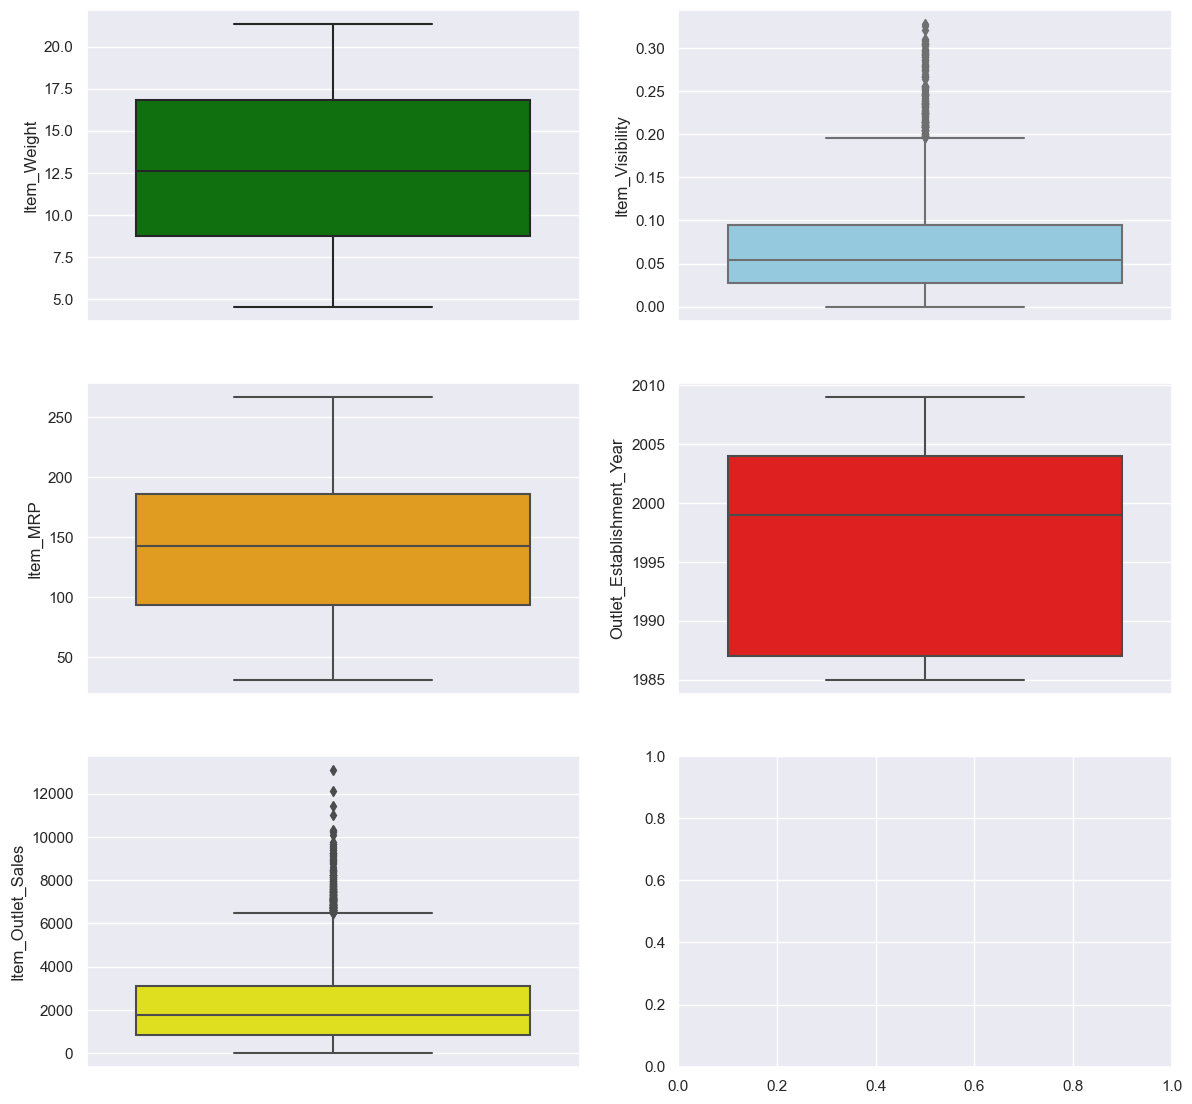

In [135]:
# Box Plot
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(3, 2, figsize=(14, 14))

sns.boxplot(data=df, y="Item_Weight", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="Item_Visibility", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="Item_MRP", ax=axs1[1, 0], color='orange')
sns.boxplot(data=df, y="Outlet_Establishment_Year", ax=axs1[1, 1], color='red')
sns.boxplot(data=df, y="Item_Outlet_Sales", ax=axs1[2, 0], color='yellow');

## Number of Null Values

In [136]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Plotting the number of null Values

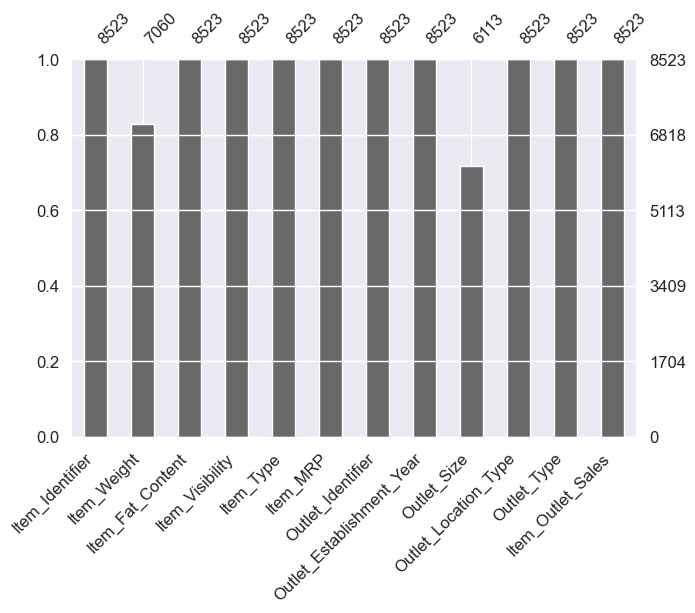

In [137]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(df, ax = ax_train, fontsize = 12);

## Replacing the values in 2 Columns

In [138]:
# Cleaning Dirty Data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

## Count Plot of Item_Fat_Content

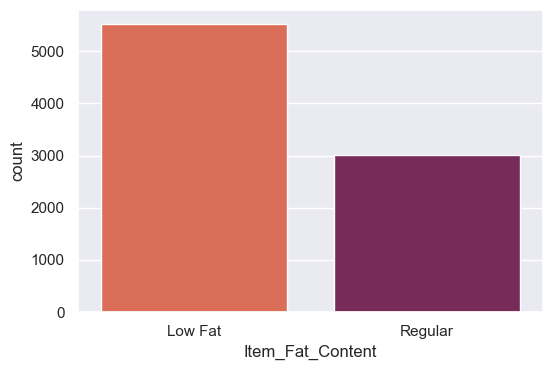

In [139]:
sns.countplot(x="Item_Fat_Content", data=df, palette="rocket_r")
plt.show()

In [140]:
df.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,NaN,555
5,Supermarket Type1,NaN,1305


In [141]:
df.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [142]:
df.groupby(['Outlet_Identifier','Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Identifier,Outlet_Size,Item_Identifier
4,OUT019,Small,528
6,OUT035,Small,930
8,OUT046,Small,930
3,OUT018,Medium,928
5,OUT027,Medium,935
9,OUT049,Medium,930
1,OUT013,High,932
0,OUT010,NaN,555
2,OUT017,NaN,926
7,OUT045,NaN,929


In [144]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Small')
df.groupby(['Outlet_Identifier','Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Identifier,Outlet_Size,Item_Identifier
0,OUT010,Small,555
2,OUT017,Small,926
4,OUT019,Small,528
6,OUT035,Small,930
7,OUT045,Small,929
8,OUT046,Small,930
3,OUT018,Medium,928
5,OUT027,Medium,935
9,OUT049,Medium,930
1,OUT013,High,932


In [145]:
#  Item_Weight
df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
118,DRA12,11.60
2879,DRA24,NaN
1148,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
1267,NCZ53,9.60
1896,NCZ54,NaN


In [146]:
# Using bfill and ffill to fill missing values
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
df['Item_Weight']=df.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')
df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
118,DRA12,11.600
1148,DRA24,19.350
1876,DRA59,8.270
3465,DRB01,7.390
1431,DRB13,6.115
...,...,...
1224,NCZ30,6.590
922,NCZ41,19.850
411,NCZ42,10.500
1267,NCZ53,9.600


In [147]:
df1 = df[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan_values = df1[df1['Item_Weight'].isna()]
print (nan_values)

     Item_Identifier  Item_Weight
4187           FDE52          NaN
1922           FDK57          NaN
927            FDN52          NaN
5022           FDQ60          NaN


In [148]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [149]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [150]:
df1 = df[['Item_Visibility', 'Item_Outlet_Sales']].copy()

df1['Item_Visibility_log'] = np.log(df1['Item_Visibility'])
df1['Item_Outlet_Sales_log'] = np.log(df1['Item_Outlet_Sales'])

df1['Item_Visibility_sqrt'] = np.sqrt(df1['Item_Visibility'])
df1['Item_Outlet_Sales_sqrt'] = np.sqrt(df1['Item_Outlet_Sales'])

ValueError: autodetected range of [-inf, -1.1135504657301631] is not finite

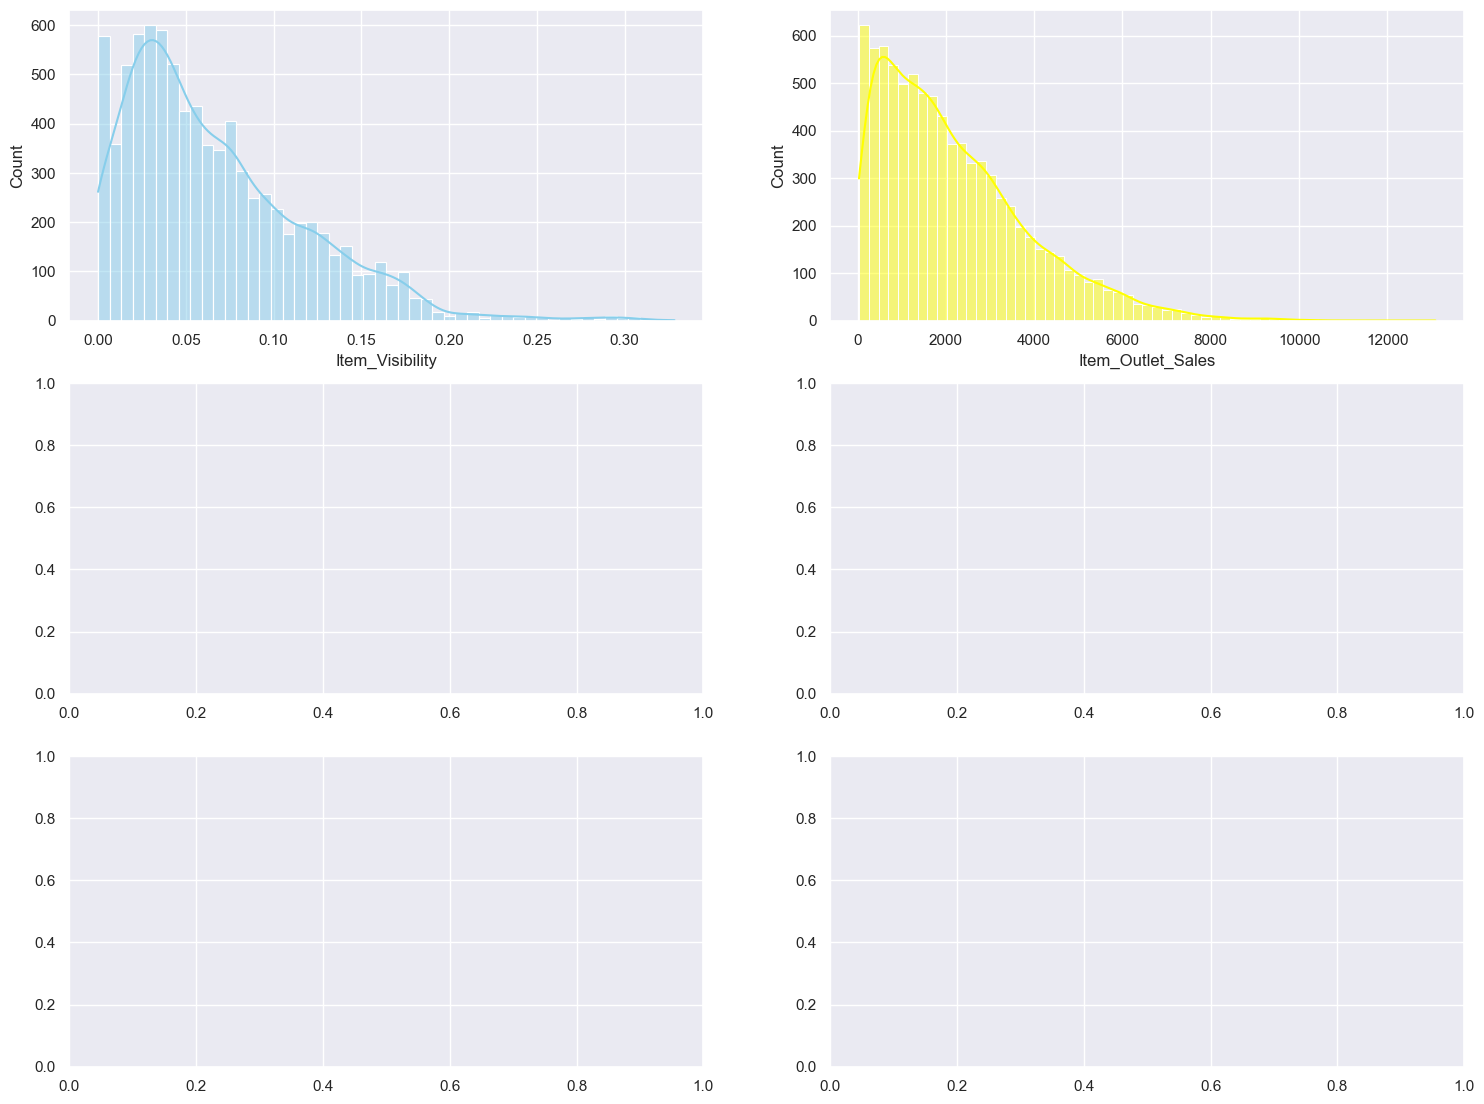

In [151]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

sns.histplot(data=df1, x="Item_Visibility", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=df1, x="Item_Outlet_Sales", kde=True, ax=axs[0, 1], color='yellow')
sns.histplot(data=df1, x="Item_Visibility_log", kde=True, ax=axs[1, 0], color='skyblue')
sns.histplot(data=df1, x="Item_Outlet_Sales_log", kde=True, ax=axs[1, 1], color='yellow')
sns.histplot(data=df1, x="Item_Visibility_sqrt", kde=True, ax=axs[2, 0], color='skyblue')
sns.histplot(data=df1, x="Item_Outlet_Sales_sqrt", kde=True, ax=axs[2, 1], color='yellow');

In [152]:
df['Item_Visibility_sqrt'] = np.sqrt(df['Item_Visibility'])
df['Item_Outlet_Sales_sqrt'] = np.sqrt(df['Item_Outlet_Sales'])

df = df.drop(columns=['Item_Visibility', 'Item_Outlet_Sales'])

## Creating Correlation Matrix

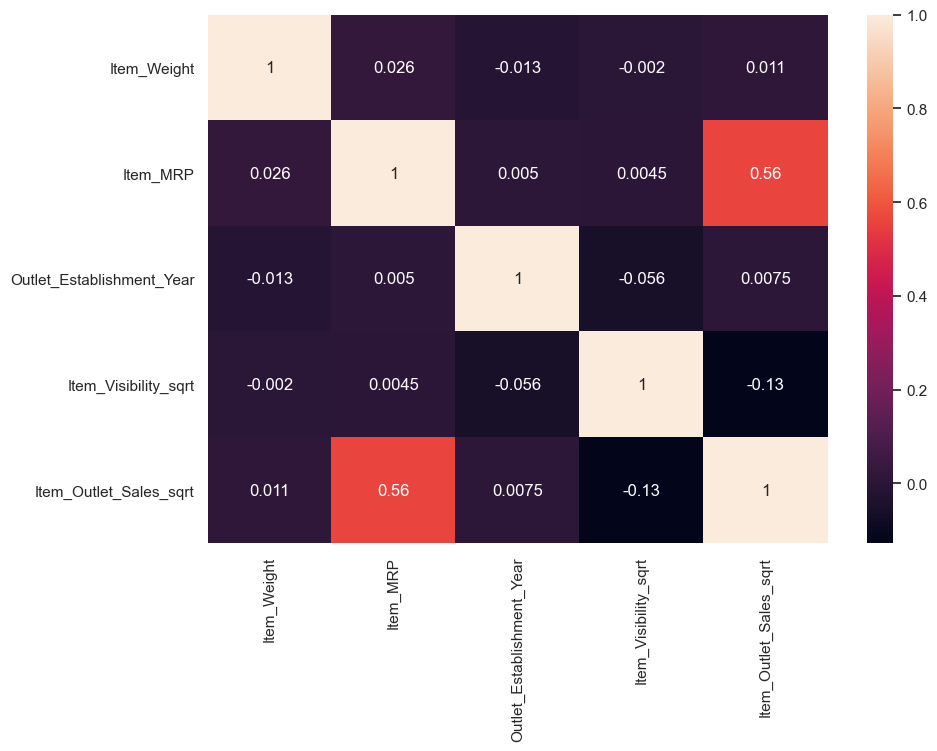

In [153]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='rocket');

In [154]:
dfreg = df.loc[df['Item_Fat_Content'] == 'Regular']
dfreg = dfreg[['Item_Type', 'Item_Identifier']]
dfreg = dfreg.groupby(['Item_Type'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Item_Identifier'], ascending=False)

dflf = df.loc[df['Item_Fat_Content'] == 'Low Fat']
dflf = dflf[['Item_Type', 'Item_Identifier']]
dflf = dflf.groupby(['Item_Type'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Item_Identifier'], ascending=False)

## Analysis of Item_type

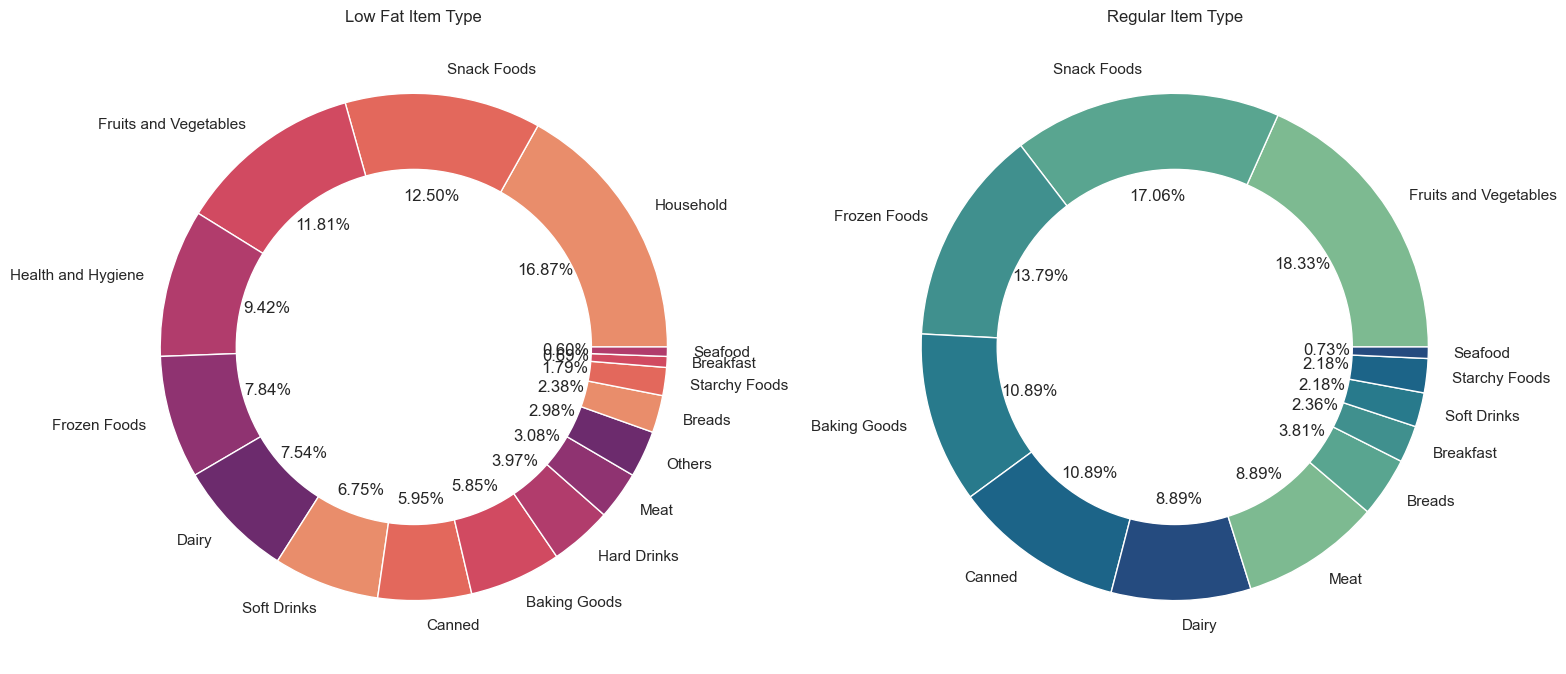

In [155]:
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Low Fat Item Type')
plt.pie(dflf['Item_Identifier'], 
        labels=dflf['Item_Type'], 
        colors=sns.color_palette('flare'), 
        autopct='%.2f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
plt.title('Regular Item Type')
plt.pie(dfreg['Item_Identifier'], 
        labels=dfreg['Item_Type'], 
        colors=sns.color_palette('crest'), 
        autopct='%.2f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre);

## Distribution of Outlet type

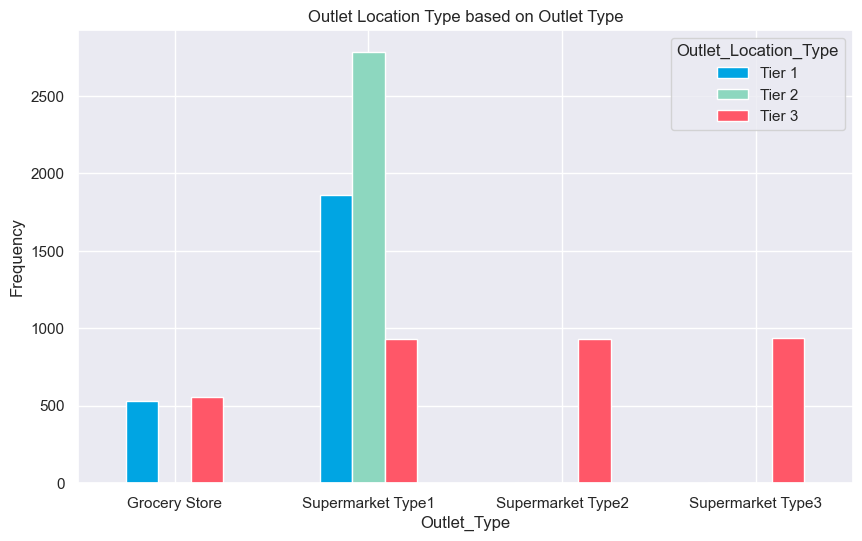

In [156]:
# outlet location type by outlet type
pd.crosstab(df.Outlet_Type,df.Outlet_Location_Type).plot(kind="bar", figsize=(10,6), color=['#00A5E3','#8DD7BF','#FF5768'])
plt.title('Outlet Location Type based on Outlet Type')
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

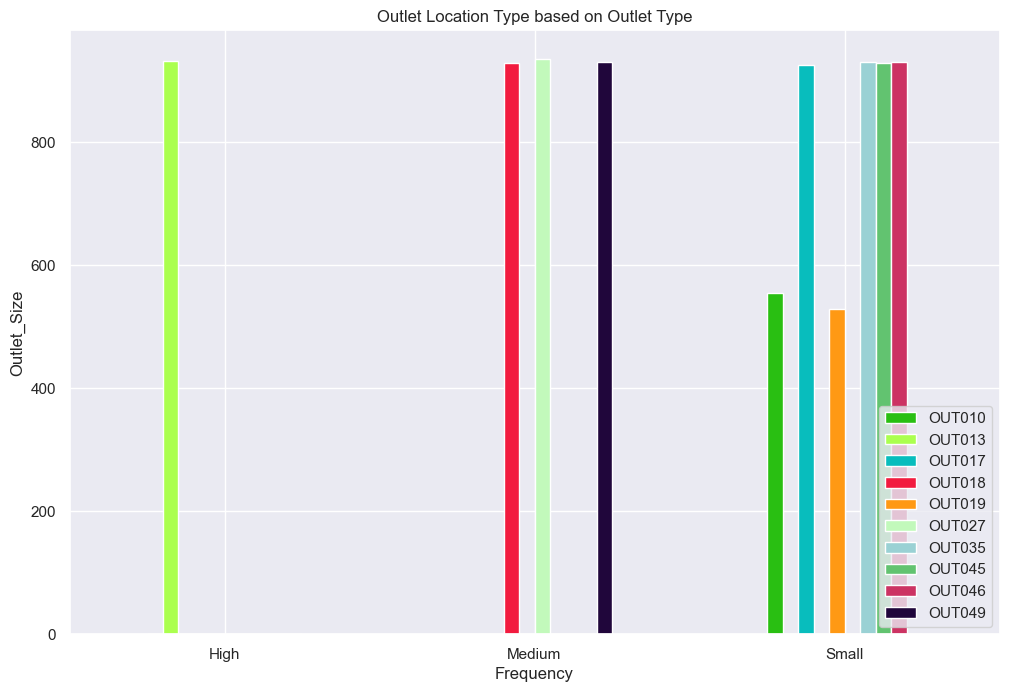

In [157]:
pd.crosstab(df.Outlet_Size,df.Outlet_Identifier).plot(kind="bar", figsize=(12,8), 
                                                      color=['#29BF12','#ABFF4F','#08BDBD', '#F21B3F','#FF9914','#C2F9BB', '#9AD1D4','#62C370','#CC3363', '#20063B'])
plt.title('Outlet Location Type based on Outlet Type')
plt.xlabel('Frequency')
plt.ylabel('Outlet_Size')
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.show()

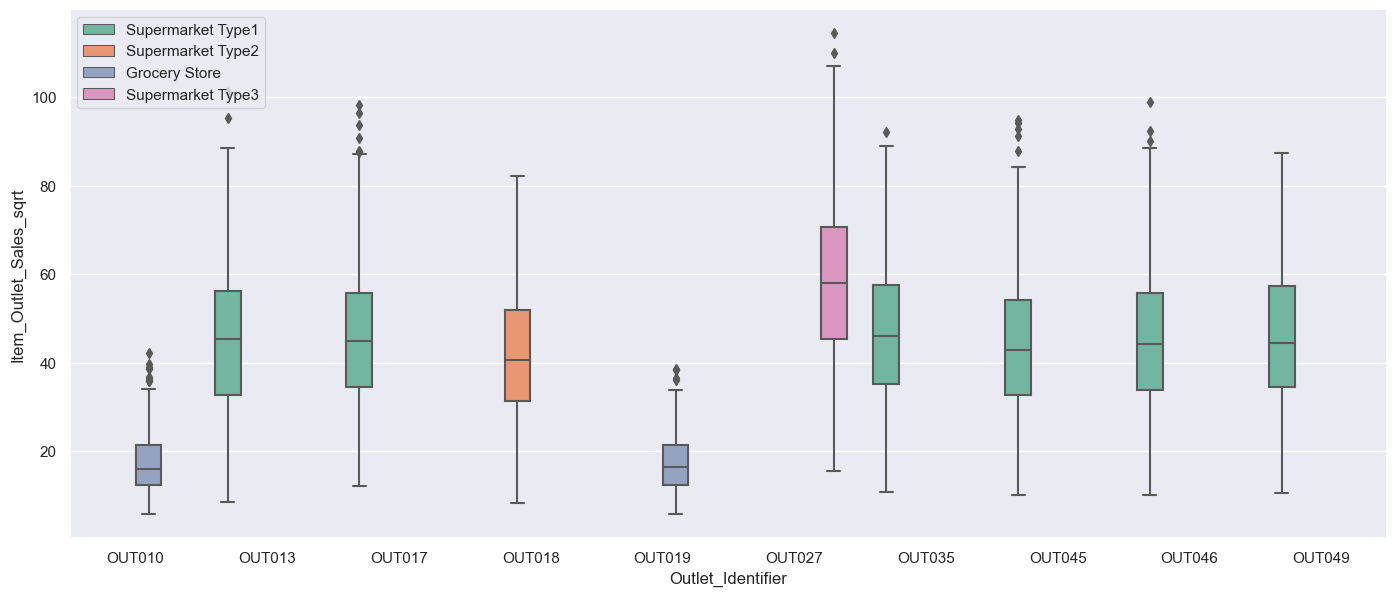

In [158]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
sns.boxplot(x="Outlet_Identifier", 
            y="Item_Outlet_Sales_sqrt", 
            order=['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'],
            hue="Outlet_Type", 
            data=df, 
            ax=ax, 
            palette='Set2')
plt.legend(loc='upper left')
plt.show()

## Scatter Plot Showing Distribution of Item_Weight vs. Item_MRP

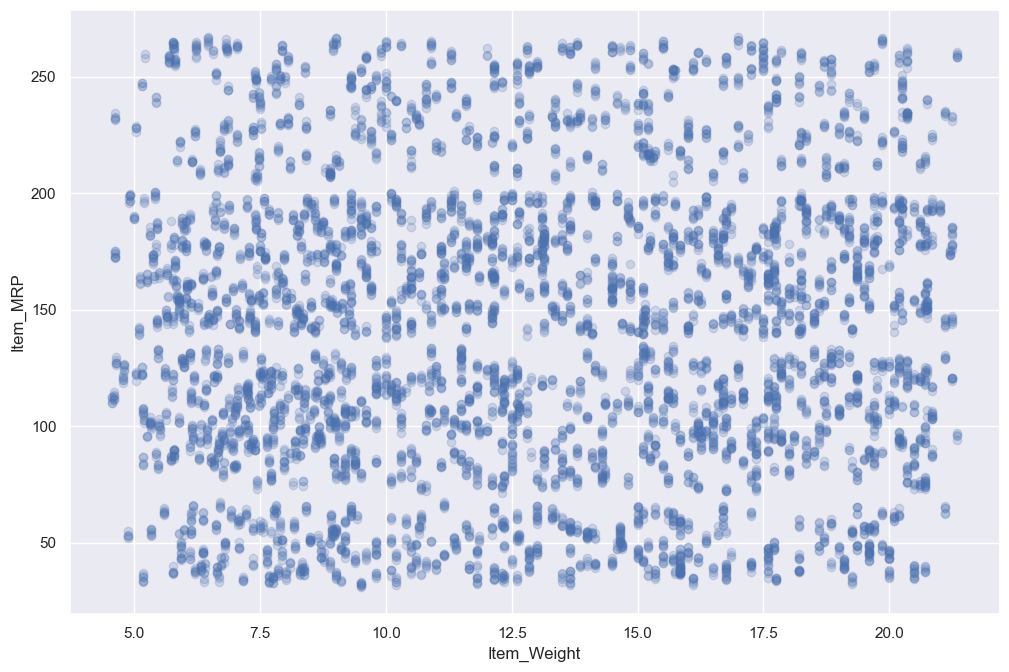

In [159]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.Item_Weight, y=df.Item_MRP, alpha=0.2)
plt.xlabel("Item_Weight")
plt.ylabel("Item_MRP")
plt.show()

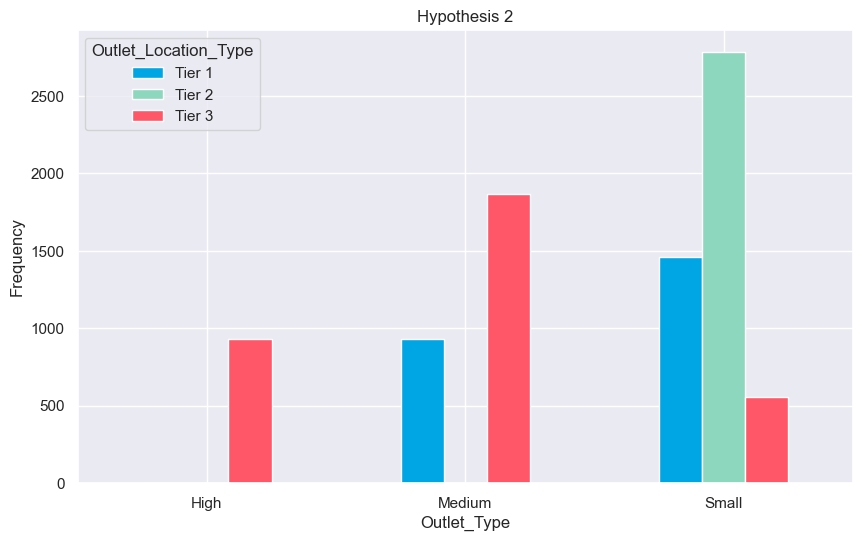

In [160]:
pd.crosstab(df.Outlet_Size,df.Outlet_Location_Type).plot(kind="bar", figsize=(10,6), color=['#00A5E3','#8DD7BF','#FF5768'])
plt.title('Hypothesis 2')
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Bar Plot Showing Distribution of Outlet_Establishment_Year

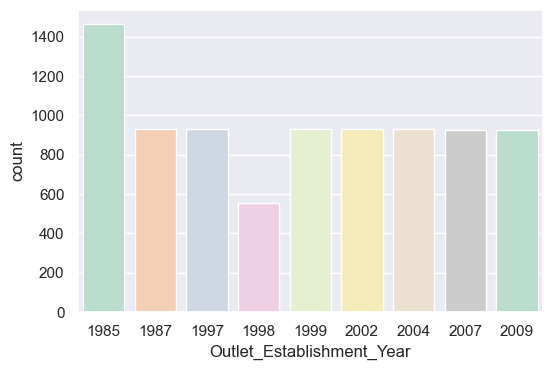

In [161]:
order = df.Outlet_Establishment_Year.sort_values().reset_index(drop=True).unique()
sns.countplot(x='Outlet_Establishment_Year', data=df, palette='Pastel2', order=order);

# Encoding the Categorical Variables

In [162]:
#  Item_Category
df['Item_Category'] = df['Item_Identifier'].astype(str).str[:2]
df['Item_Category'] = df['Item_Category'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])

In [163]:
df['Age_Outlet'] = 2023-df['Outlet_Establishment_Year']

In [164]:
bin = [1, 10, 20, 100]
outlet_cat = ['New Outlet', 'Moderate Outlet', 'Old Outlet']
df['Outlet_Category'] = pd.cut(df['Age_Outlet'], bins=bin, labels=outlet_cat)

In [165]:
# Label Encoding
df['Item_Fat_Content_Encoding'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular'],['0', '1'])

In [166]:
a = pd.get_dummies(df['Item_Category'], prefix = "Item_Category")
b = pd.get_dummies(df['Outlet_Category'], prefix = "Outlet_Category")
c = pd.get_dummies(df['Outlet_Size'], prefix = "Outlet_Size")
d = pd.get_dummies(df['Outlet_Location_Type'], prefix = "Outlet_Location_Type")

frames = [df, a, b, c, d]
df = pd.concat(frames, axis = 1)

In [167]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Category_Non-Consumable,Outlet_Category_New Outlet,Outlet_Category_Moderate Outlet,Outlet_Category_Old Outlet,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,1,0,1,0,1,0,0
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,1,0,0,1,0,0,0,1
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,1,0,1,0,1,0,0
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,...,0,0,0,1,0,0,1,0,0,1
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,1,0,0,0,0,1
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,...,0,0,0,1,0,0,1,0,1,0
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,...,1,0,1,0,0,0,1,0,1,0
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,1,0,0,1,0,0,0,1


In [168]:
le = LabelEncoder()

df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

In [169]:
# dropping object types features
df = df.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)
df = df.drop(['Item_Category','Outlet_Category'], axis=1)

In [170]:
df['Item_Fat_Content_Encoding'] = df['Item_Fat_Content_Encoding'].astype(int)

In [171]:
df.dtypes

Item_Weight                        float64
Item_Fat_Content                     int32
Item_MRP                           float64
Outlet_Establishment_Year            int64
Outlet_Size                          int32
Outlet_Location_Type                 int32
Item_Visibility_sqrt               float64
Item_Outlet_Sales_sqrt             float64
Age_Outlet                           int64
Item_Fat_Content_Encoding            int32
Item_Category_Drink                  uint8
Item_Category_Food                   uint8
Item_Category_Non-Consumable         uint8
Outlet_Category_New Outlet           uint8
Outlet_Category_Moderate Outlet      uint8
Outlet_Category_Old Outlet           uint8
Outlet_Size_High                     uint8
Outlet_Size_Medium                   uint8
Outlet_Size_Small                    uint8
Outlet_Location_Type_Tier 1          uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Location_Type_Tier 3          uint8
dtype: object

# Splitting the Dataframe into X(independent) and Y(dependent) Variables

In [172]:
X = df
Y = df['Item_Outlet_Sales_sqrt']
X.drop('Item_Outlet_Sales_sqrt', axis=1, inplace = True)

X

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Visibility_sqrt,Age_Outlet,Item_Fat_Content_Encoding,Item_Category_Drink,...,Item_Category_Non-Consumable,Outlet_Category_New Outlet,Outlet_Category_Moderate Outlet,Outlet_Category_Old Outlet,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.300,0,249.8092,1999,1,0,0.126678,24,0,0,...,0,0,0,1,0,1,0,1,0,0
1,5.920,1,48.2692,2009,1,2,0.138846,14,1,1,...,0,0,1,0,0,1,0,0,0,1
2,17.500,0,141.6180,1999,1,0,0.129461,24,0,0,...,0,0,0,1,0,1,0,1,0,0
3,19.200,1,182.0950,1998,2,2,0.000000,25,1,0,...,0,0,0,1,0,0,1,0,0,1
4,8.930,0,53.8614,1987,0,2,0.000000,36,0,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,1987,0,2,0.238293,36,0,0,...,0,0,0,1,1,0,0,0,0,1
8519,8.380,1,108.1570,2002,2,1,0.216754,21,1,0,...,0,0,0,1,0,0,1,0,1,0
8520,10.600,0,85.1224,2004,2,1,0.187580,19,0,0,...,1,0,1,0,0,0,1,0,1,0
8521,7.210,1,103.1332,2009,1,2,0.381078,14,1,0,...,0,0,1,0,0,1,0,0,0,1


# Splitting into train and test set

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Modeling

## Linear regression

In [174]:
lin = LinearRegression()

lin.fit(X_train, y_train)

LinearRegression()

In [175]:
Y_Pred = lin.predict(X_test)
Y_Pred

array([35.75  , 13.9375, 35.1875, ..., 56.0625, 48.4375, 46.5625])

### R2 Score using Linear Regression

In [176]:
R_lr = r2_score(y_test, Y_Pred)
R_lr

0.49040351846245744

## Decision Tree Regressor

In [177]:
DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [178]:
Y_Pred = DT.predict(X_test)
Y_Pred

array([17.95124508, 39.2173176 , 26.27612224, ..., 32.17637332,
       31.91667276, 36.55489844])

### R2 Score using Decision Tree Regressor

In [179]:
R2_dt = r2_score(y_test, Y_Pred)
R2_dt

0.3096185869970701

## Random Forest Regressor

In [180]:
RT = RandomForestRegressor()

RT.fit(X_train, y_train)

RandomForestRegressor()

In [181]:
Y_Pred = RT.predict(X_test)
Y_Pred

array([23.94524425, 30.93621864, 24.20507678, ..., 61.56899173,
       37.29930399, 48.28675919])

### R2 Score on using Random forest Regressor

In [182]:
R2_rf = r2_score(y_test, Y_Pred)
R2_rf

0.6364512225334897

## Xgboost Regressor

In [183]:
from xgboost import XGBRegressor

Xgb = XGBRegressor()

Xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [184]:
Y_Pred = Xgb.predict(X_test)
Y_Pred

array([27.103636, 30.442596, 28.12165 , ..., 59.47134 , 40.11415 ,
       51.44509 ], dtype=float32)

### R2 Score Using Xgboost Regressor

In [185]:
R2_xg = r2_score(y_test, Y_Pred)
R2_xg

0.6236897065559035

## SVR and Xgboost with Cross Validation

In [188]:
SVR_rbf = SVR(kernel = 'linear')
XR = XGBRegressor()

#--------------------->   GridSearchCV   <-----------------------------------
param_grid = {'C' :[0.1,1,10,100,1000], 'gamma' : [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVR_rbf , param_grid , verbose = 3 , n_jobs = -1)
grid.fit(X_train,y_train)
SVR_y_pred = grid.predict(X_test)


#---------------------> Hyper Parameter Optimization <-----------------------
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

#-------------> Define the grid of Hyperparameters to search
hyperparameter_grid = { 'n_estimators': n_estimators,'max_depth': max_depth,'booster': booster,
                       'learning_rate': learning_rate,'min_child_weight': min_child_weight,
                       'base_score' : base_score}
random_cv = RandomizedSearchCV(estimator = XR,
                              param_distributions=hyperparameter_grid,
                              cv=5,n_iter = 50,
                              scoring = 'neg_mean_absolute_error',n_jobs = -1,
                              verbose = 5,
                              return_train_score=True,
                              random_state=42)

random_cv.fit(X_train,y_train)
XR_y_pred = random_cv.predict(X_test)

# -----------------> Best Parameters <---------------------
#grid.best_parameter_
#random_cv.best_parameter_


# -----------------> Final Results <------------------------

print("Mean Squared Error in SVM",np.sqrt(mean_squared_error(y_test,SVR_y_pred)))
print("Mean Squared Error in XGBoost",np.sqrt(mean_squared_error(y_test,XR_y_pred)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 14.0min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.2min finished


Mean Squared Error in SVM 13.012222197505931
Mean Squared Error in XGBoost 10.539932114802362


### R2 Score on using Xgboost Regressor using CV and best Parameters

In [189]:
R2_xg_cv = r2_score(y_test, XR_y_pred)
R2_xg_cv

0.6644508846934769

### R2 Score on using SVR using CV and best Parameters

In [190]:
R2_sr_cv = r2_score(y_test, SVR_y_pred)
R2_sr_cv

0.4885732826974283

# Results

In [191]:
metric_results= {'Model': ['linear Regression', 'Decision Tree','RandomForest','Xgboost','SVR(cv)','Xgboost(cv)'], 
                 'R Square': [R_lr,R2_dt, R2_rf,R2_xg,R2_sr_cv,R2_xg_cv]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.490404
1,Decision Tree,0.309619
2,RandomForest,0.636451
3,Xgboost,0.623690
4,SVR(cv),0.488573
5,Xgboost(cv),0.664451


# Conclusion